# Introduction to scikit-learn

In [1]:
# 0. End to end scikit learn workflow
# 1. Getting the data ready
# 2. Choose the right algorithm/estimator
# 3. Fit the model/algorithm and use it to make predictions on data
# 4. Evaluating a model
# 5. Improve a model
# 6. Save and load a trained model
# 7. Putting it all together

# 0. An End to End scikit learn workflow

# 1. Get the data ready

In [1]:
#import Pandas, NumPy, and Matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#Import data file
df = pd.read_csv(r'C:\Users\jesst\OneDrive\Desktop\Capstone\2022 pers QBE.csv')

In [2]:
#Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2221 non-null   int64 
 1   Calc YR Salary             2221 non-null   object
 2   Yearly PERS Contributions  2221 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.2+ KB


In [3]:
#Check data to see how many tuples in 'age' have a null value
df.isna().sum()

Age                          0
Calc YR Salary               0
Yearly PERS Contributions    0
dtype: int64

In [4]:
#Convert data in columns from string to float
cleaned_data = (df[['Age', 'Calc YR Salary', 'Yearly PERS Contributions']].replace( '[\$,) ]+','',regex=True ).replace( '[(]','-',regex=True ).replace( '0.00', regex=True ).astype(float))
cleaned_data

,Age,Calc YR Salary,Yearly PERS Contributions
0,39.0,40135.44,10069.83
1,59.0,41316.11,10310.02
2,51.0,41579.60,10453.15
3,62.0,41786.44,10591.45
4,18.0,41923.83,10345.45
...,...,...,...
2216,53.0,167056.19,44057.18
2217,22.0,167310.81,45016.93
2218,62.0,167535.37,32768.28
2219,50.0,168112.62,44043.02


In [5]:
age = cleaned_data.loc[:, 'Age'].values
yr_salary = cleaned_data.loc[:, 'Calc YR Salary'].values
pers_contributions = cleaned_data.loc[:, 'Yearly PERS Contributions'].values

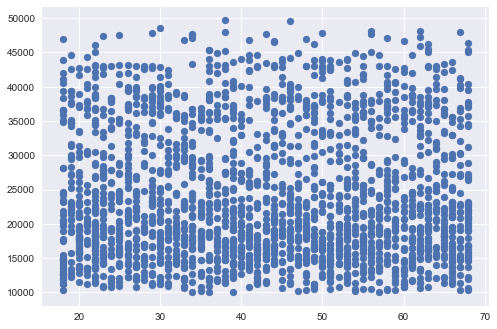

In [23]:
plt.scatter(age, pers_contributions)

<AxesSubplot:>

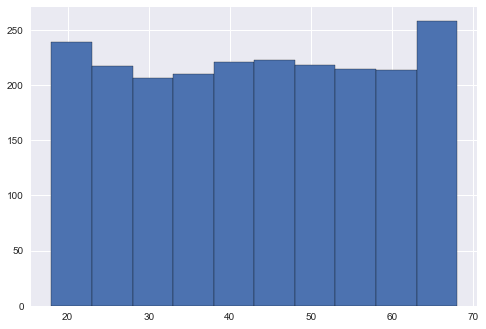

In [24]:
plt.style.use('seaborn')
cleaned_data['Age'].hist(edgecolor = 'black')

<AxesSubplot:>

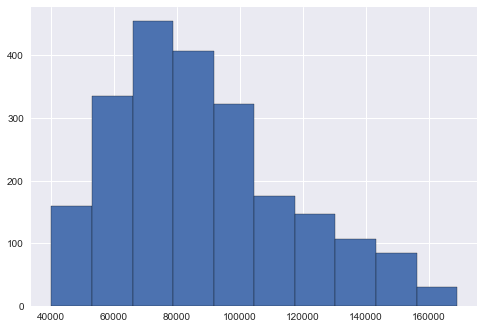

In [25]:
cleaned_data['Calc YR Salary'].hist(edgecolor = 'black')

<AxesSubplot:>

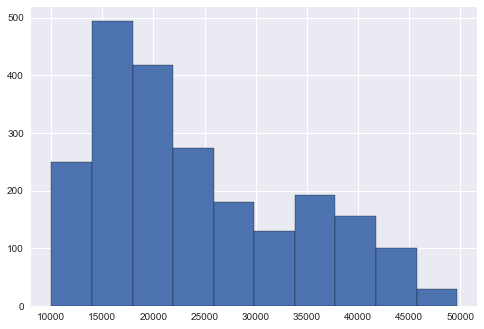

In [26]:
cleaned_data['Yearly PERS Contributions'].hist(edgecolor = 'black')

In [27]:
#Import the TrainTestSplit class and the OneHotEncoder class
from sklearn.model_selection import train_test_split as tts

#Split the data into X and y sets(X = features, y = labels)
X = cleaned_data.drop("Yearly PERS Contributions", axis=1)
y = cleaned_data["Yearly PERS Contributions"]

#Split the data into test and training sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

# 2. Choose the right algorithm

In [28]:
#Import the RandomForestRegressor class
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-3))
Pipeline(steps=[('standardscaler', StandardScaler()),('sgdregressor', SGDRegressor())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [29]:
#Fit the linear Regression model using the training data
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=2000))])

In [30]:
#Test the RandomForestRegressor model using the test data and get the score
regr.score(X_test, y_test)

0.6375486914471373

# 3. Use trained model to make predictions

In [31]:
#Use 'predict' on just the 'X_test' dataset to see what the model gives
regr.predict(X_test[:5])

array([30015.9882    , 22295.28167807, 27068.00142693, 24017.9397481 ,
       23201.70131883])

In [32]:
#Compare predicted amounts to the truth labels to evaluate the model
y_preds = regr.predict(X_test)
np.array(y_test[:5])

array([37841.25, 19621.02, 28646.88, 21272.42, 33669.92])

In [33]:
#Import accuracy_score class *** doesn't work. Throws an error due to inability for accuracy_score to handle mixed class and continuous numbers
#from sklearn.metrics import accuracy_score

#accuracy_score(y_test, y_preds)
#np.mean(y_preds == y_test)


from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)


4219.619237960839